In [1]:
#This notebook reduces the raw light images using the master-bias, master-dark-per-sec and master-flat images.
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output
import random

plt.rcParams.update({'font.size':15})

In [2]:
#This input locates the filepaths for each image file required
image_list = []
n = 0

filepath =     ''
flatfilepath = "C://Users//micha//OneDrive - University of Bath//Astro group project//M66 Analysis//Flat//Blue//master_flat.fits"




biasfilepath = "C://Users//micha//OneDrive - University of Bath//Astro group project//M66 Analysis//Bias//master_bias.fits"
barkfilepath = "C://Users//micha//OneDrive - University of Bath//Astro group project//M66 Analysis//Dark//master_dark_per_sec.fits"


for file in glob.glob(filepath+"M66*.fits"): #The 'D' stops it picking up past master_frames
    image_list.append(file)
    n=n+1
print("\n".join(image_list))


M66_60_sec_blue.fits


In [3]:
#Data is obtained from the master-bias image to show as a plot as well as its' statistics:
masterbias_image = fits.getdata(biasfilepath)

Min: 1.7777777777777777
Max: 26.22222222222222
Mean: 7.25915625054237
Median 7.222222222222222
Stdev: 0.5604253418315441


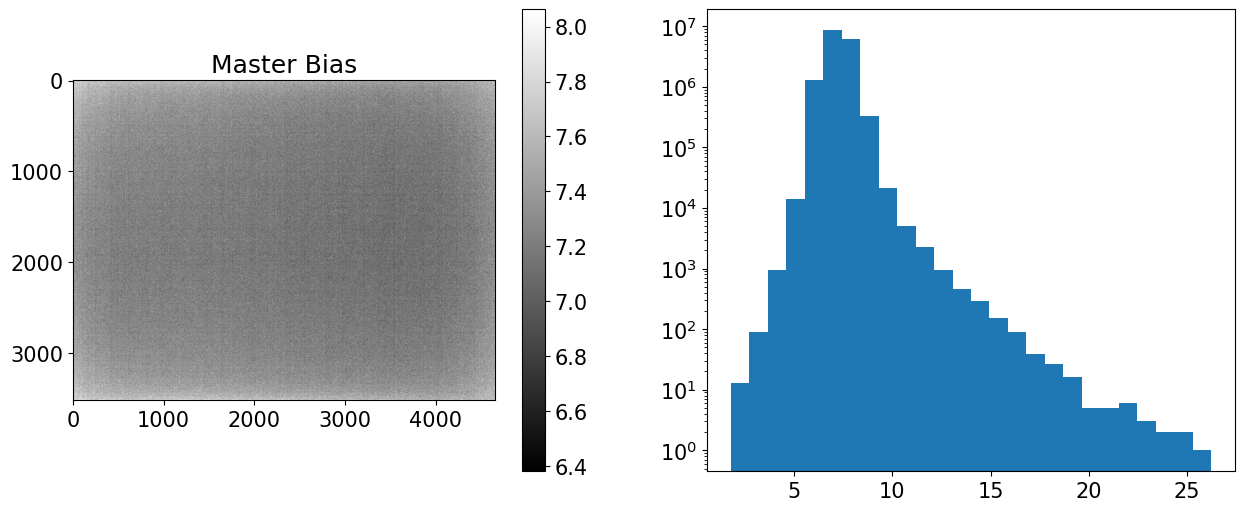

In [4]:
plt.figure(figsize=(15,6))

N_std = 1.5

print('Min:', np.min(masterbias_image) )
print('Max:', np.max(masterbias_image)  )    
print('Mean:', np.mean(masterbias_image)  )
print('Median', np.median(masterbias_image)  )
print('Stdev:', np.std(masterbias_image)  )

plt.subplot(1,2,1)
plt.imshow(masterbias_image, cmap='gray', 
               vmin= np.median(masterbias_image) - N_std*np.std(masterbias_image), vmax=np.median(masterbias_image) + N_std*np.std(masterbias_image)) 
plt.title("Master Bias")
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(masterbias_image.flatten(),bins=int(np.max(masterbias_image)))
plt.yscale('log')
  
plt.show()

In [5]:
#Data is obtained from the master-dark-per-sec image to show as a plot as well as its' statistics:
masterdark_image = fits.getdata(barkfilepath)

Min: -0.26666666666666666
Max: 45.39876543209876
Mean: 0.020533225098324802
Median 0.019753086419753086
Stdev: 0.0285425520012894


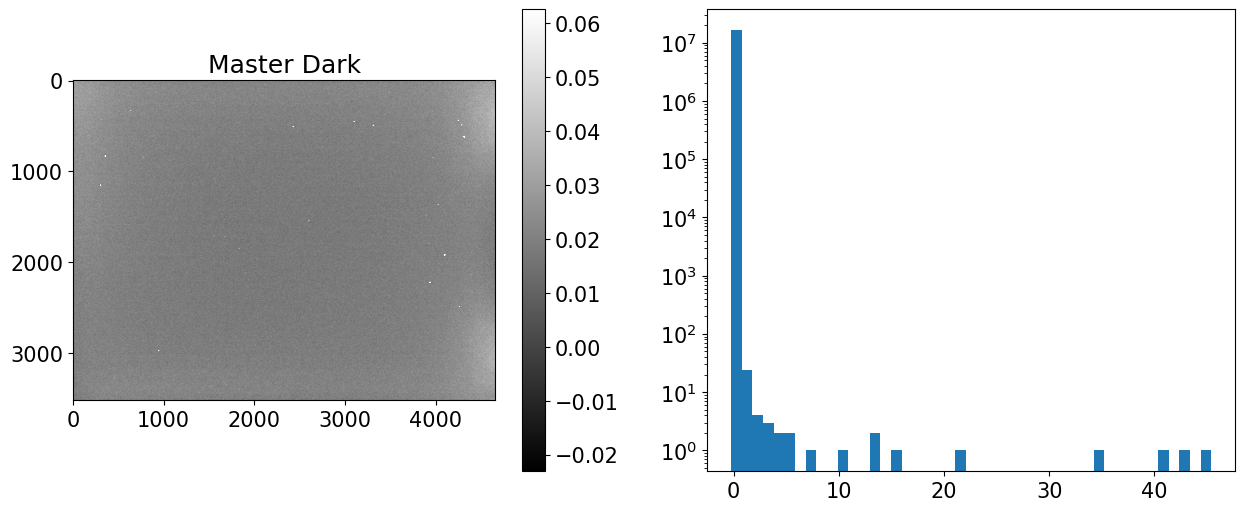

In [6]:
plt.figure(figsize=(15,6))

N_std = 1.5

print('Min:', np.min(masterdark_image) )
print('Max:', np.max(masterdark_image)  )    
print('Mean:', np.mean(masterdark_image)  )
print('Median', np.median(masterdark_image)  )
print('Stdev:', np.std(masterdark_image)  )

plt.subplot(1,2,1)
plt.imshow(masterdark_image, cmap='gray', 
               vmin= np.median(masterdark_image) - N_std*np.std(masterdark_image), vmax=np.median(masterdark_image) + N_std*np.std(masterdark_image)) 
plt.title("Master Dark")
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(masterdark_image.flatten(),bins=int(np.max(masterdark_image)))
plt.yscale('log')
  
plt.show()

In [7]:
#Data is obtained from the master-flat image to show as a plot as well as its' statistics:
master_flat_image = fits.getdata(flatfilepath)

Min: 0.8373936496611184
Max: 1.1810495971768336
Mean: 1.0006274804874211
Median 0.9994358194112742
Stdev: 0.047002224919506855


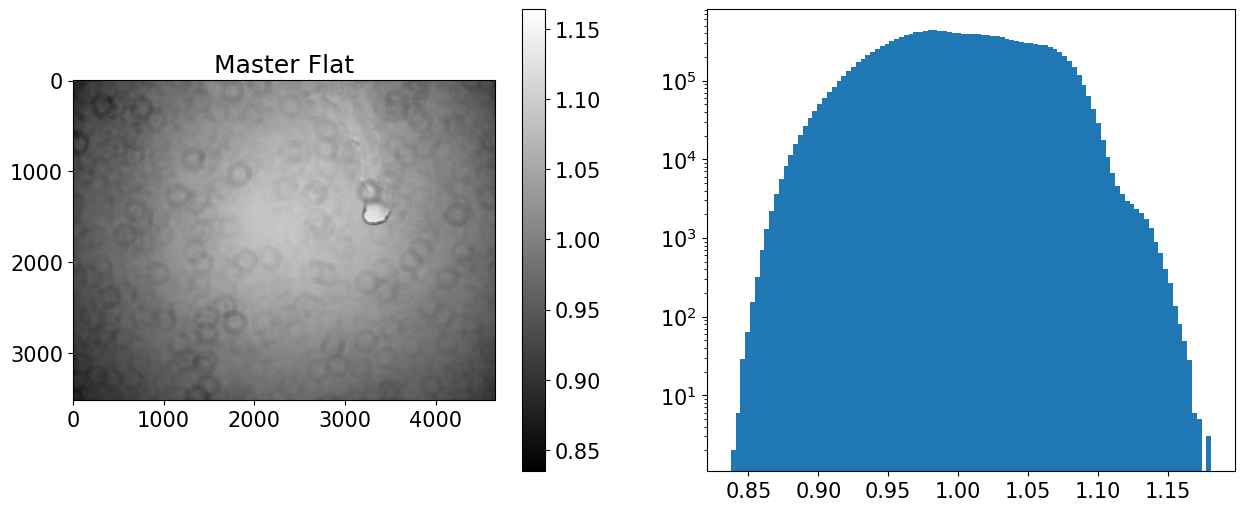

In [8]:
plt.figure(figsize=(15,6))

N_std = 3.5

print('Min:', np.min(master_flat_image) )
print('Max:', np.max(master_flat_image)  )    
print('Mean:', np.mean(master_flat_image)  )
print('Median', np.median(master_flat_image)  )
print('Stdev:', np.std(master_flat_image)  )

plt.subplot(1,2,1)
plt.imshow(master_flat_image, cmap='gray', 
               vmin= np.median(master_flat_image) - N_std*np.std(master_flat_image), vmax=np.median(master_flat_image) + N_std*np.std(master_flat_image)) 
plt.title("Master Flat")
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(master_flat_image.flatten(),bins=100)
plt.yscale('log')
  
plt.show()

0/0


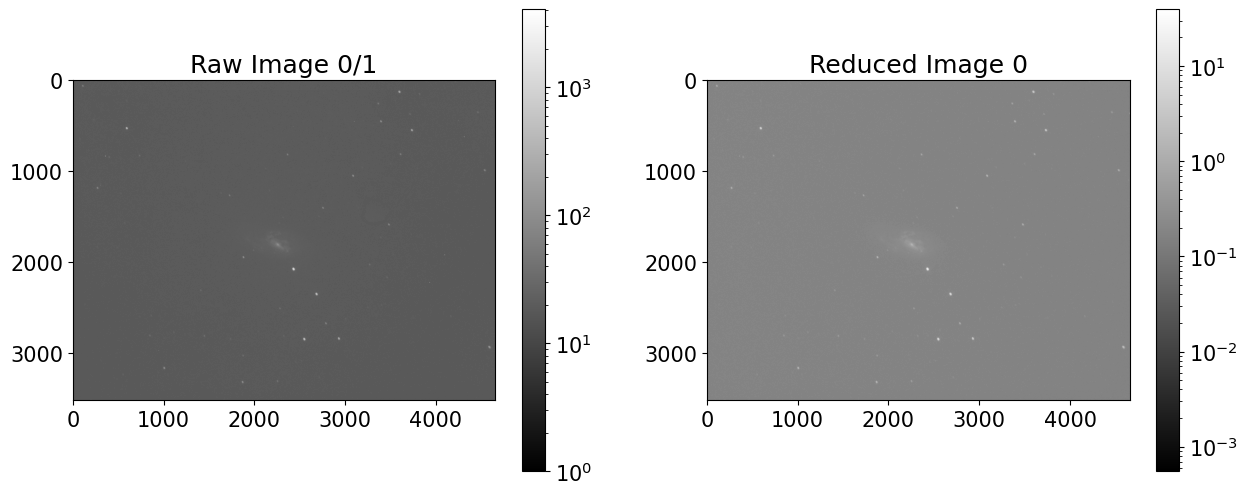

In [9]:
#The image reduction begins:
for i in range(n):
    print(str(i) + "/" + str(n-1))
    #clear_output(wait=True)
    plt.figure(figsize=(15,6))
    
    reduced_image = []
    raw_image = []
    raw_image = fits.getdata(image_list[i]) / 16 # remove factor of 16 for out camera
    
    
    image_hdr = []
    image_hdr = fits.getheader(image_list[i], 0)
    
    #Extract exposure time from each image:
    exposure = image_hdr["EXPTIME "]
    
    #This produces the reduced image:
    reduced_image = (raw_image - masterdark_image*exposure - masterbias_image) / master_flat_image
    
    #Pixels now show the flux per second:
    reduced_image = reduced_image / exposure
    
    #This prints some statistics of the new reduced image:
    print('Min:', np.min(raw_image), np.min(reduced_image) )
    print('Max:', np.max(raw_image), np.max(reduced_image)  )    
    print('Mean:', np.mean(raw_image), np.mean(reduced_image)  )
    print('Median', np.median(raw_image), np.median(reduced_image)  )
    
    #Two plots were made to compare the raw image and reduced image:
    plt.subplot(1,2,1)
    plt.imshow(raw_image, cmap='gray',norm=LogNorm() )
    plt.title("Raw Image "+ str(i) + "/" + str(n) )
    plt.colorbar()


    plt.subplot(1,2,2)
    plt.imshow(reduced_image, cmap='gray',norm=LogNorm())#, vmin = 0.1), 
    plt.title("Reduced Image "+ str(i))
    plt.colorbar()
  
    plt.show()
    
    outfile = filepath+'Reduced_'+os.path.basename(image_list[i])

    hdu = fits.PrimaryHDU(reduced_image,image_hdr)
    hdu.header['REDTIME'] = 1

    hdu.writeto(outfile, overwrite=True)
   